In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


pd.options.mode.chained_assignment = None

def convert(seconds): 
    seconds = seconds % (24 * 3600) 
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
      
    return "%d:%02d:%02d" % (hour, minutes, seconds)

def conversions(dataframe):
    """
    :param dataframe: Dataframe with activities represented as rows
    :return: Converted values for columns -
    average_speed from metres/second to km/hr
    distance from metres to kilometres
    elapsed_time from seconds to minutes
    moving_time from seconds to minutes

    """
    dataframe['average_speed'] = dataframe['average_speed'] * 16.666667
    dataframe['distance'] = dataframe['distance'] * 0.001
    dataframe['elapsed_time'] = dataframe['elapsed_time'] * 0.0166667
    dataframe['moving_time'] = dataframe['moving_time'] * 0.0166667

    return dataframe


data = pd.read_csv('.\combined_data.csv', sep=',', header='infer')

#drop columns - unnamed,gear_id, utc_offset  
data = data.drop(data.columns[[0, 6, 16]], axis = 1)

#convert
df = conversions(data)
df['speed-seconds'] = (df['elapsed_time'] / df['distance']) * 60
df.head()

,average_heartrate,average_speed,distance,elapsed_time,end_latlng,max_heartrate,moving_time,name,start_date,start_date_local,start_latitude,start_latlng,start_longitude,type,workout_type,speed-seconds
0,162.50,39.70,0.65,4.63,"[51.508085, -0.031475]",169.00,4.52,Cool down,2020-08-10T16:58:50Z,2020-08-10T17:58:50Z,51.51,"[51.509694, -0.039661]",-0.04,Run,0.00,430.74
1,170.30,49.27,9.32,55.92,"[51.510069, -0.039991]",186.00,52.55,London is melting 🥵,2020-08-10T16:01:48Z,2020-08-10T17:01:48Z,51.49,"[51.486372, -0.017355]",-0.02,Run,0.00,359.99
2,153.90,43.87,5.01,31.93,"[51.489239, -0.011559]",170.00,31.70,Easy 5k,2020-08-07T16:40:57Z,2020-08-07T17:40:57Z,51.49,"[51.486294, -0.017364]",-0.02,Run,0.00,382.70
3,162.70,44.23,9.57,64.15,"[51.489342, -0.008253]",183.00,60.07,Afternoon Run,2020-08-06T16:12:06Z,2020-08-06T17:12:06Z,51.49,"[51.486333, -0.017467]",-0.02,Run,0.00,402.35
4,nan,49.38,9.50,53.43,NaN,nan,53.43,Evening Run,2020-08-03T17:48:31Z,2020-08-03T18:48:31Z,nan,NaN,nan,Run,nan,337.47


#### Monthly Mileage

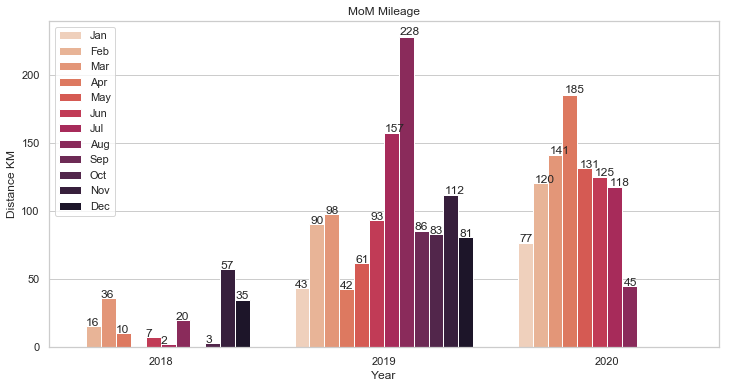

In [83]:
#clean data
%matplotlib inline
mileage_df = df[df['distance']!=0]
mileage_df['speed_km/min'] = mileage_df['speed-seconds'].apply(lambda x: convert(x))
distance = mileage_df[['speed_km/min','distance', 'start_date', 'moving_time' ]]
distance['date'] = pd.to_datetime(df['start_date'])
distance = distance.drop(['start_date'], axis =1)
dist = distance[['date', 'distance']]
dist['year'] = pd.DatetimeIndex(dist['date']).year
dist['month'] = pd.DatetimeIndex(dist['date']).month

#Visualization
import math

sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize = (12, 6))
fig = sns.barplot(x = 'year', y = 'distance', data = dist, estimator = sum,
                  ci = None, ax = ax, hue = 'month', palette = 'rocket_r')
plt.legend(['Jan', 'Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set(xlabel = 'Year', ylabel = 'Distance KM', title = 'MoM Mileage')

for p in ax.patches:
    height = p.get_height()
    if math.isnan(height):
        pass
    else:
        ax.annotate(str(int(round(p.get_height()))), (p.get_x() * 1.005, p.get_height() * 1.005))

#### Speed for Varying Distance 

[Text(0, 0.5, 'Seconds/KM'),
 Text(0.5, 0, 'Intervals KM'),
 Text(0.5, 1.0, 'Speed Variation Over Distance Intervals')]

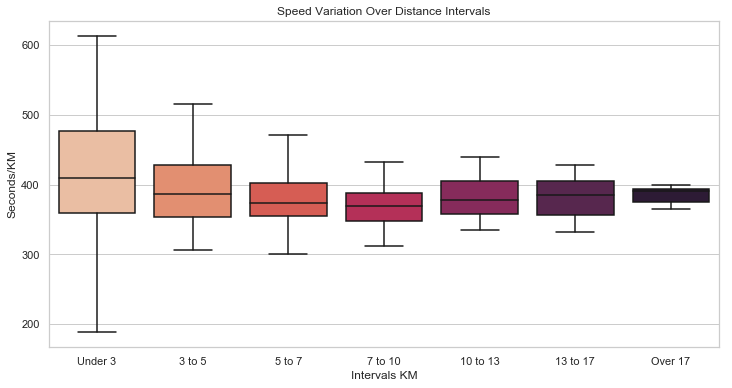

In [85]:
def get_intervals(d):
    if d < 3:
        return 'Under 3'
    elif d >= 3 and d <= 5:
        return '3 to 5'
    elif d > 5 and d <= 7:
        return '5 to 7'
    elif d > 7 and d <= 10:
        return '7 to 10'
    elif d > 10 and d <= 13:
        return '10 to 13'
    elif d > 13 and d <= 17:
        return '13 to 17'
    elif d > 17:
        return 'Over 17'

#clean data
speed_df = df[df['distance']!=0]
speed_df.head()
speed_df['speed_km/min'] = speed_df['speed-seconds'].apply(lambda x: convert(x))
speed_df = speed_df[['average_speed', 'distance', 'speed-seconds', 'speed_km/min']]
speed_df['intervals'] = speed_df['distance'].apply(lambda x : get_intervals(x))

#visualization
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize = (12, 6))

fig = sns.boxplot(x = 'intervals', y = 'speed-seconds', data = speed_df , 
                  palette = 'rocket_r', showfliers = False,
                 order = ['Under 3', '3 to 5', '5 to 7', '7 to 10'
                         ,'10 to 13', '13 to 17', 'Over 17'])

ax.set(xlabel = 'Intervals KM', ylabel = 'Seconds/KM', title = 'Speed Variation Over Distance Intervals')

In [90]:
speed_df['intervals'].value_counts()

5 to 7      83
7 to 10     70
3 to 5      62
Under 3     52
10 to 13    29
13 to 17    19
Over 17     16
Name: intervals, dtype: int64

#### Distance Intervals 

[Text(0, 0.5, 'Duration'),
 Text(0.5, 0, 'Intervals KM'),
 Text(0.5, 1.0, 'Duration Over Distance Intervals')]

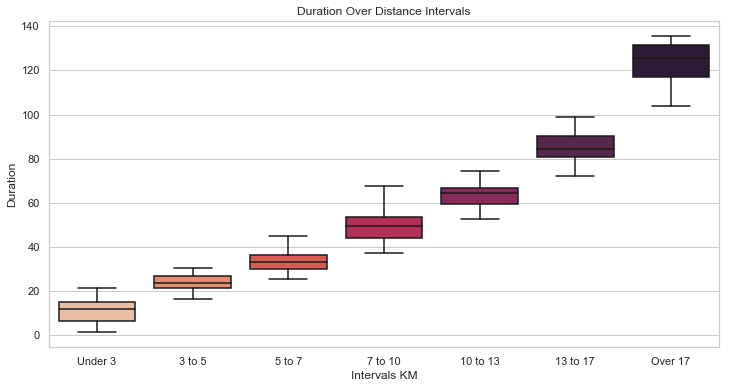

In [93]:
distance_df = df[df['distance']!=0]
distance_df = distance_df[['average_speed', 'distance', 'speed-seconds', 'moving_time']]
distance_df['intervals'] = distance_df['distance'].apply(lambda x : get_intervals(x))


#visualization
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize = (12, 6))

fig = sns.boxplot(x = 'intervals', y = 'moving_time', data = distance_df , 
                  palette = 'rocket_r', showfliers = False,
                 order = ['Under 3', '3 to 5', '5 to 7', '7 to 10'
                         ,'10 to 13', '13 to 17', 'Over 17'])

ax.set(xlabel = 'Intervals KM', ylabel = 'Duration', title = 'Duration Over Distance Intervals')


#### Run Break Down 

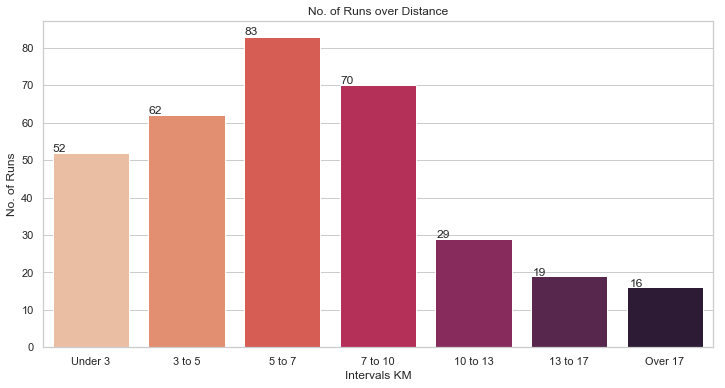

In [102]:
distance_df = df[df['distance']!=0]
distance_df = distance_df[['average_speed', 'distance', 'speed-seconds', 'moving_time']]
distance_df['intervals'] = distance_df['distance'].apply(lambda x : get_intervals(x))

sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize = (12, 6))

fig = sns.countplot(x = 'intervals', data = distance_df, palette = 'rocket_r', 
                   order = ['Under 3', '3 to 5', '5 to 7', '7 to 10'
                         ,'10 to 13', '13 to 17', 'Over 17'])

ax.set(xlabel = 'Intervals KM', ylabel = 'No. of Runs', title = 'No. of Runs over Distance')


for p in ax.patches:
    height = p.get_height()
    if math.isnan(height):
        pass
    else:
        ax.annotate(str(int(round(p.get_height()))), (p.get_x() * 1.005, p.get_height() * 1.005))